<a href="https://colab.research.google.com/github/Rohithtechis/Linear-Regression-project/blob/main/Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [3]:
data=pd.read_csv('/content/SeoulBikeData.csv')
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
print('Dimension of dataset is',data.shape)

Dimension of dataset is (8760, 14)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [6]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
data.dtypes

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

In [9]:
# The factors that influence the number of bike rented.
df=data.columns[2:]
df

Index(['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
#Exploring the data for outliers and missing values.

In [11]:
# ckecking the missing values
data_mv=data.isna().sum()
data_mv

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [12]:
data_corr=data.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [13]:
# We plot boxplot to find the outliers. 

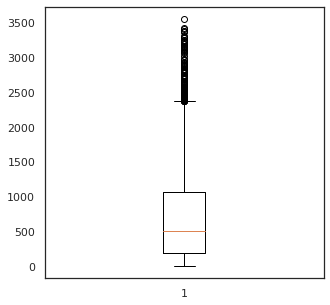

In [14]:
plt.figure(figsize=(5,5,))
x=data['Rented Bike Count']
plt.boxplot(x)
plt.show()

Correlation between the variables


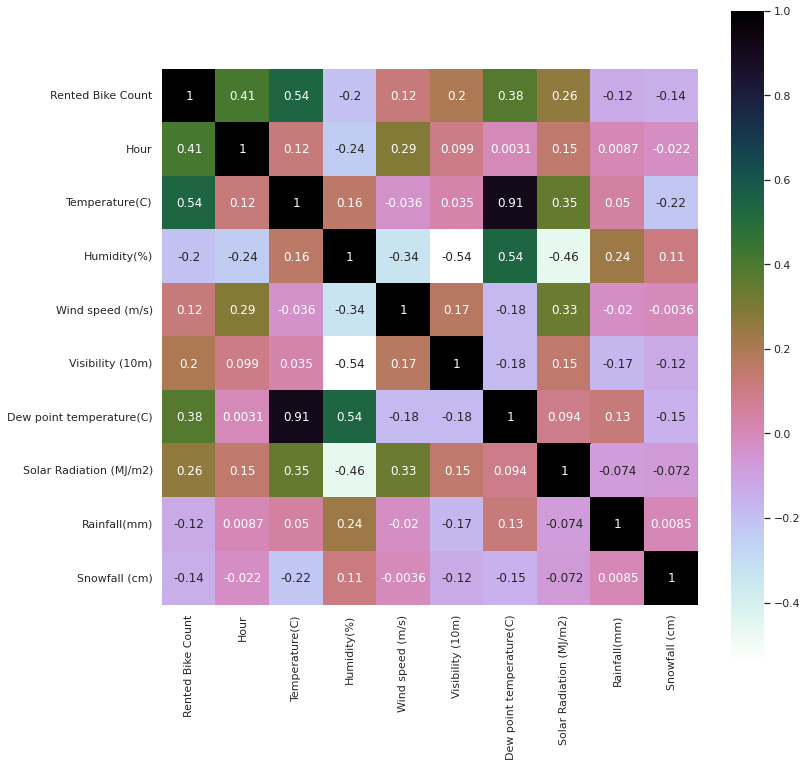

In [15]:
corr=data.corr()
plt.figure(figsize=(12,12))
print('Correlation between the variables')
sns.heatmap(corr, annot=True , cmap='cubehelix_r', square=True)

We plot the heatmap to understant the correlation between the variables, with rented bike concidering the relation more the 30% are Hour, temperature(C) and Dew point tempature,  Hence the tempature and dew point tempature is highly correlated we can eliminate the Dew point tempature.


In [16]:
#Droping the Dew point tempature.
data =data.drop(['Dew point temperature(C)'],axis=1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     8760 non-null   object 
 1   Rented Bike Count        8760 non-null   int64  
 2   Hour                     8760 non-null   int64  
 3   Temperature(C)           8760 non-null   float64
 4   Humidity(%)              8760 non-null   int64  
 5   Wind speed (m/s)         8760 non-null   float64
 6   Visibility (10m)         8760 non-null   int64  
 7   Solar Radiation (MJ/m2)  8760 non-null   float64
 8   Rainfall(mm)             8760 non-null   float64
 9   Snowfall (cm)            8760 non-null   float64
 10  Seasons                  8760 non-null   object 
 11  Holiday                  8760 non-null   object 
 12  Functioning Day          8760 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 889.8+ KB


In [19]:
dataCorr=pd.DataFrame(data.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation with bike count'])
dataCorr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation with bike count
Rented Bike Count,1.000000
Temperature(C),0.538558
Hour,0.410257
Solar Radiation (MJ/m2),0.261837
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


In [ ]:
# Building the linear regression model to predict rented bike count by choosing appropriate independentvariables.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [21]:
X=data.drop(['Rented Bike Count','Date','Seasons','Holiday','Functioning Day'],axis =1)
Y=data.iloc[:,1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2)

In [22]:
# 80% of dataset
X_train.shape, Y_train.shape

((7008, 8), (7008,))

In [23]:
# 20% of dataset
X_test.shape, Y_test.shape

((1752, 8), (1752,))

In [24]:
# LInear Regression Model
regr = linear_model.LinearRegression()
fitregr=regr.fit(X_train, Y_train)
predregrtrain=fitregr.predict(X_train)
predregrtest=fitregr.predict(X_test)

In [25]:
# Predicts the X_train
Y_pred_train = regr.predict(X_train)

In [26]:
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [ 2.71233746e+01  3.21722551e+01 -7.65124363e+00  7.41428555e+00
  2.67906275e-02 -8.23993791e+01 -5.77639969e+01  2.54983856e+01]
Intercept: 431.8250279810727
Mean squared error (MSE): 218824.12
Coefficient of determination (R^2): 0.48


In [29]:
# Predicts the X_test
Y_pred_test = regr.predict(X_test)

In [30]:
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [ 2.71233746e+01  3.21722551e+01 -7.65124363e+00  7.41428555e+00
  2.67906275e-02 -8.23993791e+01 -5.77639969e+01  2.54983856e+01]
Intercept: 431.8250279810727
Mean squared error (MSE): 226512.71
Coefficient of determination (R^2): 0.44


In [31]:
# Linear regression equation 
print('yintercept = %.2f' % regr.intercept_)
print('LogP = %.2f LogP' % regr.coef_[0])
print('MW = %.4f MW' % regr.coef_[1])
print('RB = %.4f RB' % regr.coef_[2])
print('AP = %.2f AP' % regr.coef_[3])

yintercept = 431.83
LogP = 27.12 LogP
MW = 32.1723 MW
RB = -7.6512 RB
AP = 7.41 AP


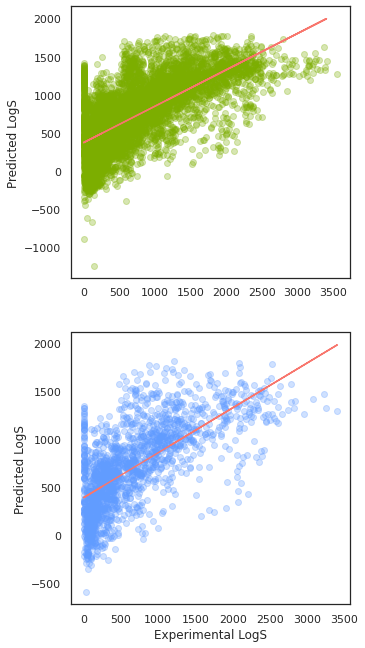

In [43]:
# Scatter plot of experimental vs. predicted Logs
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,11))
plt.subplot(2,1,1)
plt.scatter(x=Y_train,y=Y_pred_train, c='#7CAE00',alpha=0.3)
z=np.polyfit(Y_train,Y_pred_train,1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),'#F8766D')
plt.ylabel('Predicted Logs')

z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')

plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.show()